In [ ]:
# ANN MODEL EXPERIMENTS

In [38]:
# reading in the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
shopping_datasetANN = pd.read_csv('shopping_trends_updated.csv')
shopping_datasetANN.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [39]:
# sum of null values, should be 0 is no null values
shopping_datasetANN.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [45]:
# sum of any duplicates
duplicate_set = shopping_datasetANN.duplicated().sum()
print(f'Duplicated rows in shoppping dataset: {duplicate_set}')

Duplicated rows in shoppping dataset: 0


In [40]:
# check for outliers
from scipy import stats
z_scores = np.abs(stats.zscore(shopping_datasetANN.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)
print(f'Number of outliers: {outliers.sum()}')

Number of outliers: 0


In [41]:
# double check what columns are in the dataset
print(shopping_datasetANN.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


<ipython-input-51-c134cbdb6978>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Gender'] = LabelEncoder().fit_transform(features['Gender'])
<ipython-input-51-c134cbdb6978>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Location'] = LabelEncoder().fit_transform(features['Location'])


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0406 - loss: 3.6877 - val_accuracy: 0.0449 - val_loss: 3.5347
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0336 - loss: 3.5206 - val_accuracy: 0.0481 - val_loss: 3.4301
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0438 - loss: 3.4078 - val_accuracy: 0.0353 - val_loss: 3.3614
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0392 - loss: 3.3433 - val_accuracy: 0.0272 - val_loss: 3.3174
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0438 - loss: 3.3053 - val_accuracy: 0.0256 - val_loss: 3.2875
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0557 - loss: 3.2816 - val_accuracy: 0.0272 - val_loss: 3.2689
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


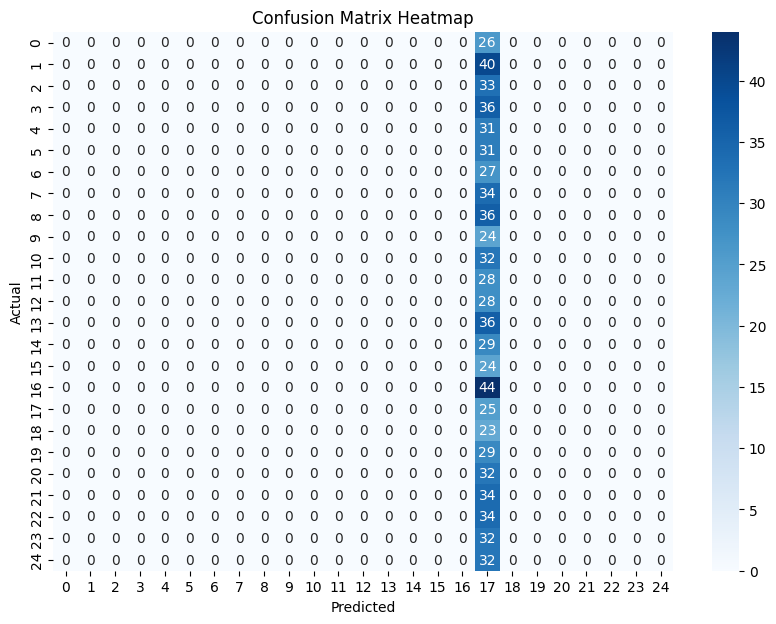

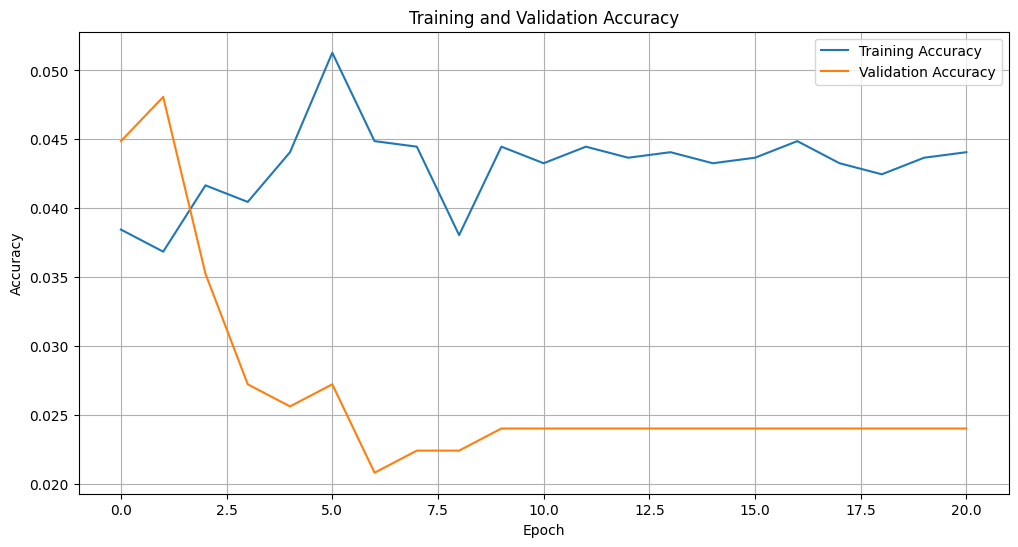

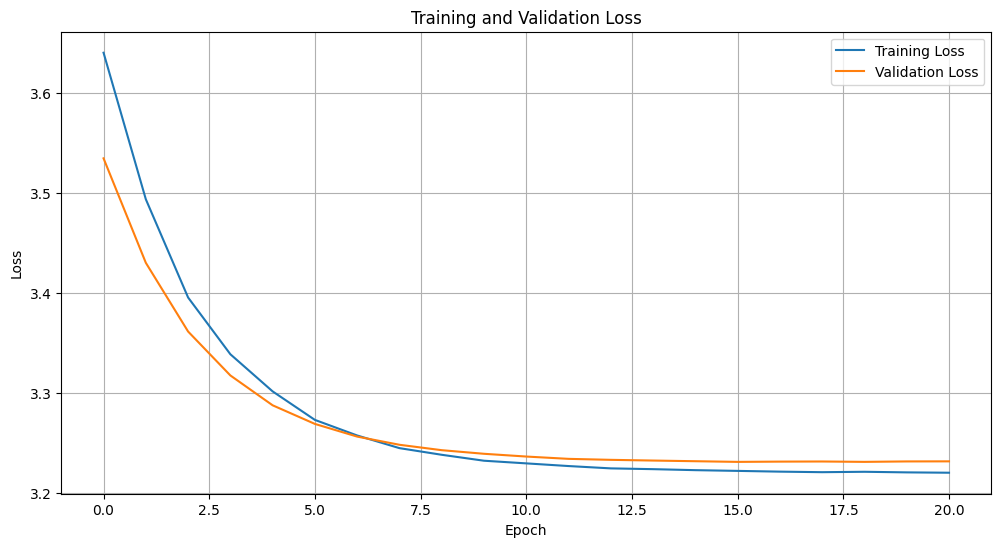

In [51]:
# experimenting with class weights, dropout layers and early stopping to remedy class imbalance
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

# preprocess for feature selection
features = shopping_datasetANN[['Age', 'Gender', 'Location']]
target = shopping_datasetANN['Item Purchased']

# encode categorical variables
features['Gender'] = LabelEncoder().fit_transform(features['Gender'])
features['Location'] = LabelEncoder().fit_transform(features['Location'])
target = LabelEncoder().fit_transform(target)

# scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# handle class imbalance by computing class weights
class_weights = compute_class_weight('balanced', classes=np.unique(target), y=target)
class_weight_dict = dict(enumerate(class_weights))

# define model with dropout and L2 regularization
def create_model():
    model = models.Sequential([
        Input(shape=(scaled_features.shape[1],)),
        layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(len(np.unique(target)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
maes = []
mses = []

for train_index, test_index in kf.split(scaled_features):
    X_train, X_test = scaled_features[train_index], scaled_features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    model = create_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                        class_weight=class_weight_dict, callbacks=[early_stopping], verbose=0)

    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracies.append(accuracy_score(y_test, y_pred))
    maes.append(mean_absolute_error(y_test, y_pred))
    mses.append(mean_squared_error(y_test, y_pred))

# final evaluation
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
model = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    class_weight=class_weight_dict, callbacks=[early_stopping], verbose=1)

y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Final Model Accuracy: {accuracy:.2f}')
print(f'Final Model Mean Absolute Error: {mae:.2f}')
print(f'Final Model Mean Squared Error: {mse:.2f}')
print("Final Model Classification Report:")
print(classification_report(y_test, y_pred))

# confusion Matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# visualize training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Average Accuracy: 0.72
Average Mean Absolute Error: 0.28
Average Mean Squared Error: 0.28
Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5742 - loss: 0.6548 - val_accuracy: 0.7452 - val_loss: 0.4702
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7305 - loss: 0.4853 - val_accuracy: 0.7404 - val_loss: 0.4445
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7201 - loss: 0.4753 - val_accuracy: 0.7452 - val_loss: 0.4386
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7427 - loss: 0.4521 - val_accuracy: 0.7452 - val_loss: 0.4370
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7211 - loss: 0.4582 - val_accuracy: 0.7436 - val_loss: 0.4362
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7365 - loss: 0.4570 -

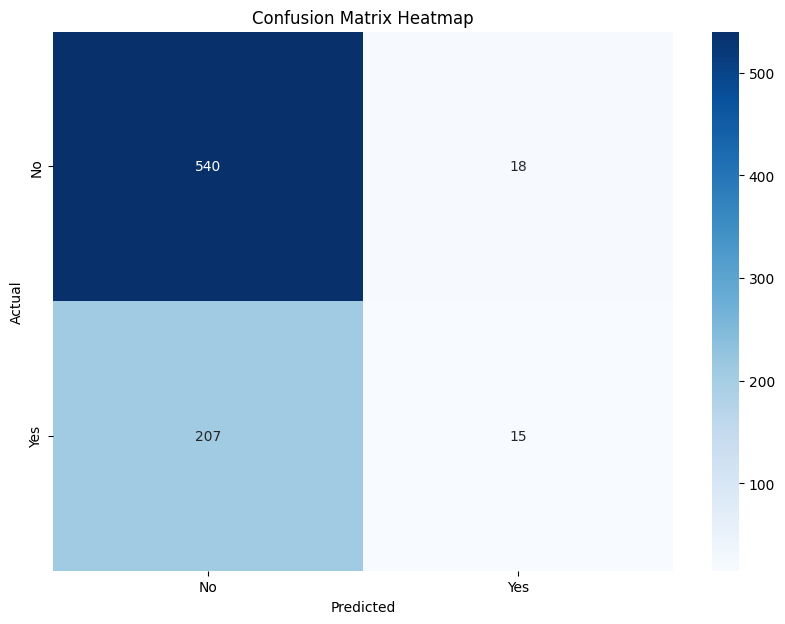

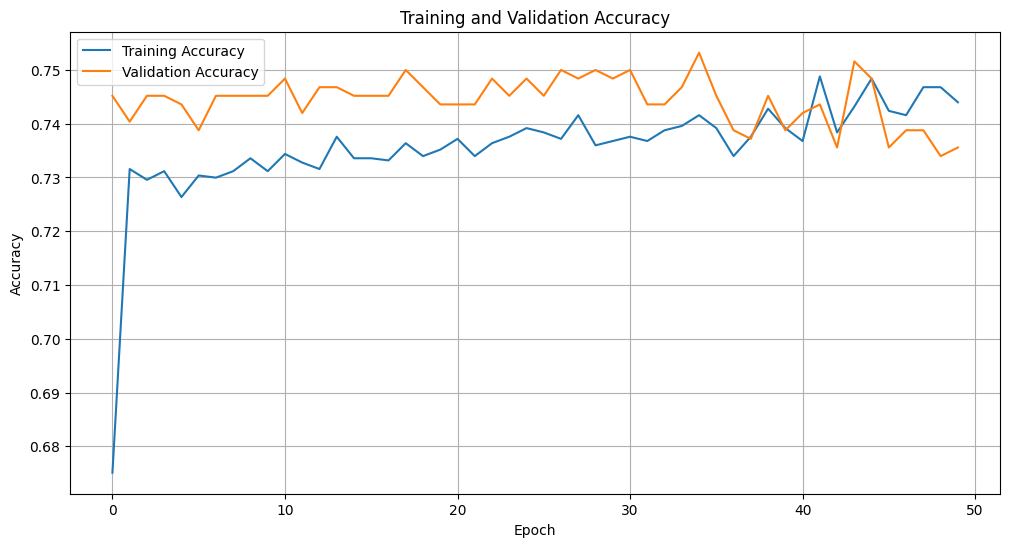

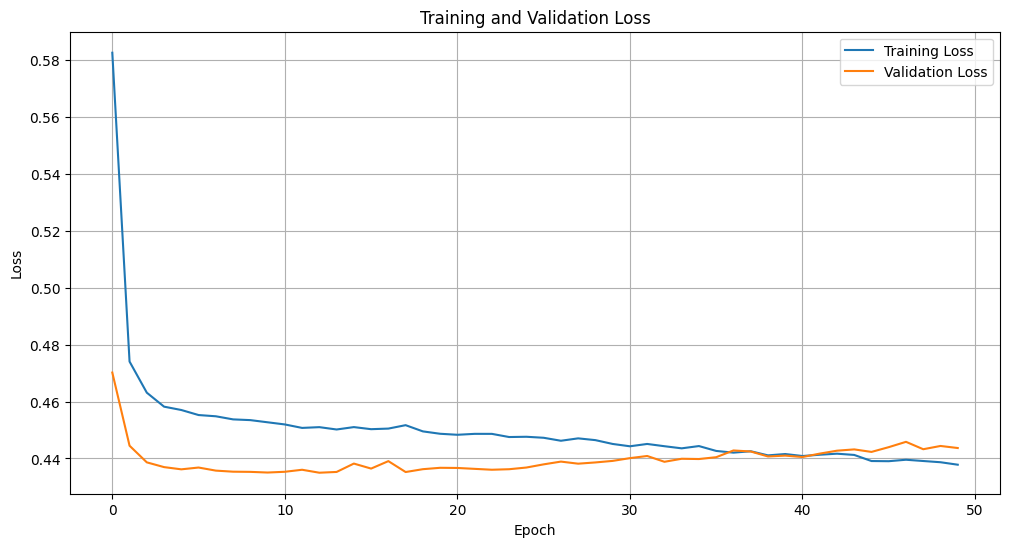

In [52]:
# question - predicting subscription status
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt
import seaborn as sns

# organising features
features = shopping_datasetANN[['Age', 'Gender', 'Purchase Amount (USD)', 'Previous Purchases', 'Frequency of Purchases']]
target = shopping_datasetANN['Subscription Status']

# convert categorical data
features.loc[:, 'Gender'] = LabelEncoder().fit_transform(features['Gender'])
features.loc[:, 'Frequency of Purchases'] = LabelEncoder().fit_transform(features['Frequency of Purchases'])
target = target.map({'Yes': 1, 'No': 0})  # Adjust mapping based on actual values

# scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# define ANN model
def create_model():
    model = models.Sequential([
        Input(shape=(scaled_features.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
maes = []
mses = []

for train_index, test_index in kf.split(scaled_features):
    X_train, X_test = scaled_features[train_index], scaled_features[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    model = create_model()
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracies.append(accuracy_score(y_test, y_pred))
    maes.append(mean_absolute_error(y_test, y_pred))
    mses.append(mean_squared_error(y_test, y_pred))

# average metrics
print(f'Average Accuracy: {np.mean(accuracies):.2f}')
print(f'Average Mean Absolute Error: {np.mean(maes):.2f}')
print(f'Average Mean Squared Error: {np.mean(mses):.2f}')

# final model training on entire dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
model = create_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# evaluate the final model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Final Model Accuracy: {accuracy:.2f}')
print(f'Final Model Mean Absolute Error: {mae:.2f}')
print(f'Final Model Mean Squared Error: {mse:.2f}')
print("Final Model Classification Report:")
print(classification_report(y_test, y_pred))

# confusion Matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# visualize training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Average Accuracy: 0.04
Average Mean Absolute Error: 8.35
Average Mean Squared Error: 104.12
Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0432 - loss: 3.2295 - val_accuracy: 0.0337 - val_loss: 3.2205
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0473 - loss: 3.2118 - val_accuracy: 0.0240 - val_loss: 3.2223
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0456 - loss: 3.2067 - val_accuracy: 0.0321 - val_loss: 3.2256
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0543 - loss: 3.2067 - val_accuracy: 0.0288 - val_loss: 3.2269
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0473 - loss: 3.2024 - val_accuracy: 0.0353 - val_loss: 3.2281
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0544 - loss: 3.1979

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


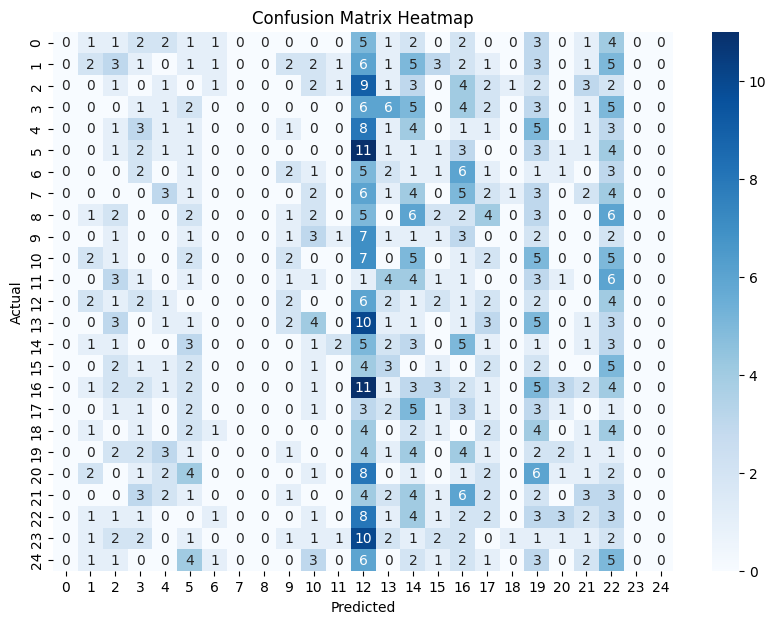

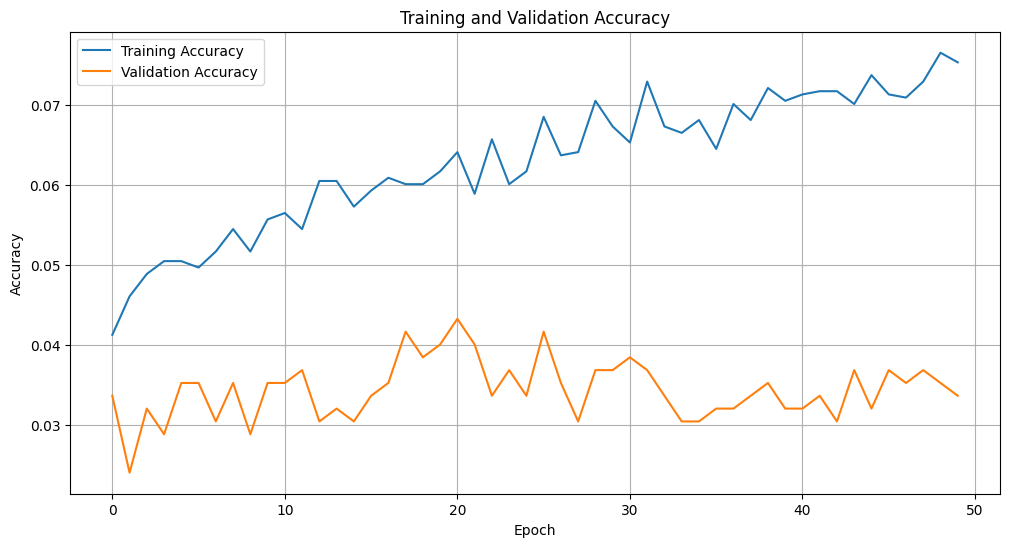

In [46]:
# question - preferred products across customer segments
# preprocess for feature select
features = shopping_datasetANN[['Age', 'Gender', 'Location']]
target = shopping_datasetANN['Item Purchased']

# encode categorical variables
features.loc[:, 'Gender'] = LabelEncoder().fit_transform(features['Gender'])
features.loc[:, 'Location'] = LabelEncoder().fit_transform(features['Location'])
target = LabelEncoder().fit_transform(target)

# scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# define ANN model
def create_model():
    model = models.Sequential([
        Input(shape=(scaled_features.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(len(np.unique(target)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
maes = []
mses = []

for train_index, test_index in kf.split(scaled_features):
    X_train, X_test = scaled_features[train_index], scaled_features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    model = create_model()
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracies.append(accuracy_score(y_test, y_pred))
    maes.append(mean_absolute_error(y_test, y_pred))
    mses.append(mean_squared_error(y_test, y_pred))

# average metrics
print(f'Average Accuracy: {np.mean(accuracies):.2f}')
print(f'Average Mean Absolute Error: {np.mean(maes):.2f}')
print(f'Average Mean Squared Error: {np.mean(mses):.2f}')

# final model training on the entire dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
model = create_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# evaluate the final model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Final Model Accuracy: {accuracy:.2f}')
print(f'Final Model Mean Absolute Error: {mae:.2f}')
print(f'Final Model Mean Squared Error: {mse:.2f}')
print("Final Model Classification Report:")
print(classification_report(y_test, y_pred))

# confusion Matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# visualize training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Average Accuracy: 0.25
Average Mean Absolute Error: 1.26
Average Mean Squared Error: 2.56
Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2438 - loss: 1.4018 - val_accuracy: 0.2388 - val_loss: 1.3879
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2679 - loss: 1.3821 - val_accuracy: 0.2468 - val_loss: 1.3885
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2650 - loss: 1.3813 - val_accuracy: 0.2484 - val_loss: 1.3884
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2793 - loss: 1.3788 - val_accuracy: 0.2500 - val_loss: 1.3865
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2846 - loss: 1.3757 - val_accuracy: 0.2612 - val_loss: 1.3889
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2946 - loss: 1.3764 -

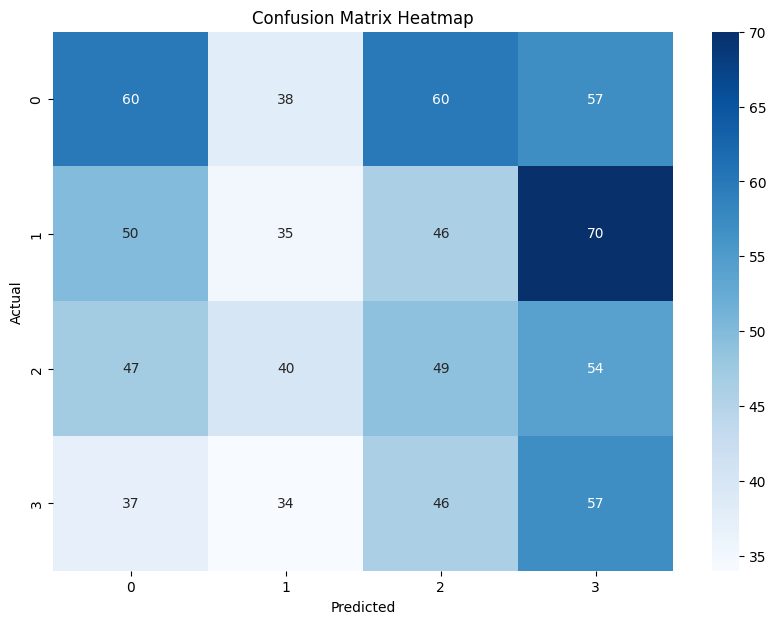

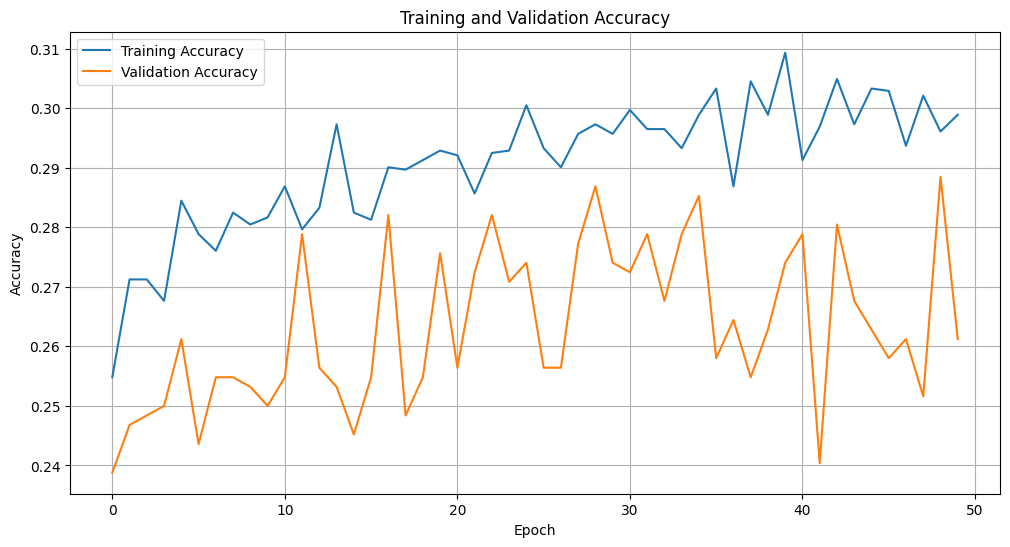

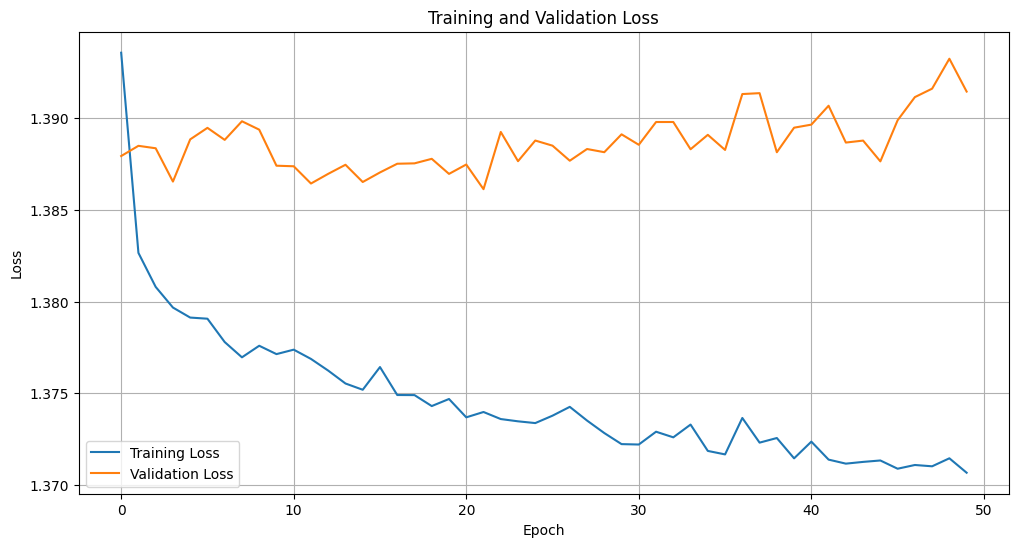

In [47]:
# question - how do purchasing patterns vary by season

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras import models, layers

# preprocess the data
features = shopping_datasetANN[['Purchase Amount (USD)', 'Category', 'Discount Applied']]
target = shopping_datasetANN['Season']

# encode categorical variables
features.loc[:, 'Category'] = LabelEncoder().fit_transform(features['Category'])
features.loc[:, 'Discount Applied'] = LabelEncoder().fit_transform(features['Discount Applied'])
target = LabelEncoder().fit_transform(target)

# scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# define ANN model
def create_model():
    model = models.Sequential([
        Input(shape=(scaled_features.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(len(np.unique(target)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
maes = []
mses = []

for train_index, test_index in kf.split(scaled_features):
    X_train, X_test = scaled_features[train_index], scaled_features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    model = create_model()
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracies.append(accuracy_score(y_test, y_pred))
    maes.append(mean_absolute_error(y_test, y_pred))
    mses.append(mean_squared_error(y_test, y_pred))

# average metrics
print(f'Average Accuracy: {np.mean(accuracies):.2f}')
print(f'Average Mean Absolute Error: {np.mean(maes):.2f}')
print(f'Average Mean Squared Error: {np.mean(mses):.2f}')

# final model training on the entire dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
model = create_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# evaluate the final model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Final Model Accuracy: {accuracy:.2f}')
print(f'Final Model Mean Absolute Error: {mae:.2f}')
print(f'Final Model Mean Squared Error: {mse:.2f}')
print("Final Model Classification Report:")
print(classification_report(y_test, y_pred))

# confusion Matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# visualize training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Average Mean Absolute Error: 20.67
Average Mean Squared Error: 565.44
Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4066.1479 - mae: 59.1277 - mse: 4066.1479 - val_loss: 3378.2808 - val_mae: 53.1767 - val_mse: 3378.2808
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3022.1790 - mae: 49.2951 - mse: 3022.1790 - val_loss: 1435.5406 - val_mae: 30.8498 - val_mse: 1435.5406
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1104.2120 - mae: 27.2033 - mse: 1104.2120 - val_loss: 649.0880 - val_mae: 21.5996 - val_mse: 649.0880
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 643.3686 - mae: 21.5264 - mse: 643.3686 - val_loss: 630.2502 - val_mae: 21.3872 - val_mse: 630.2502
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 624.5009 - mae: 21.2833 - mse: 624

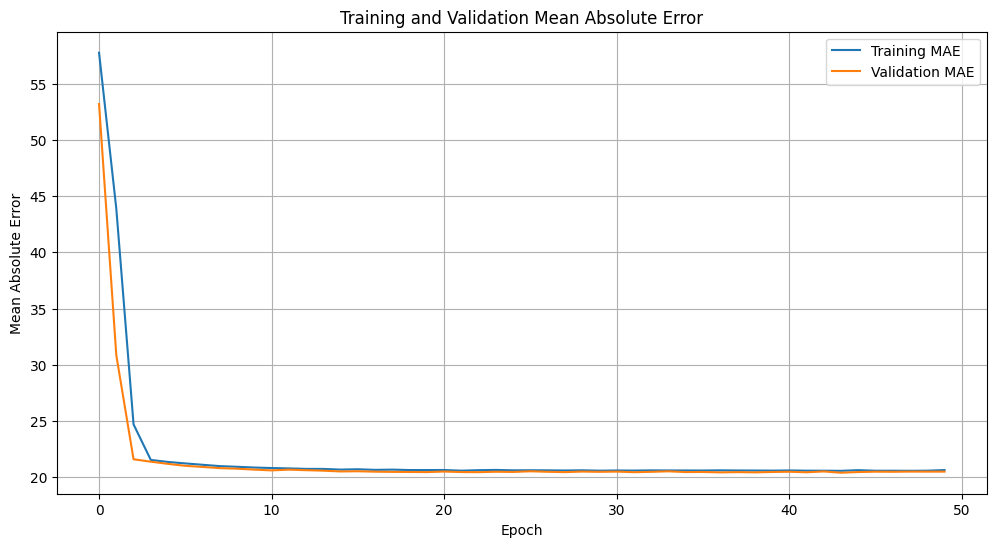

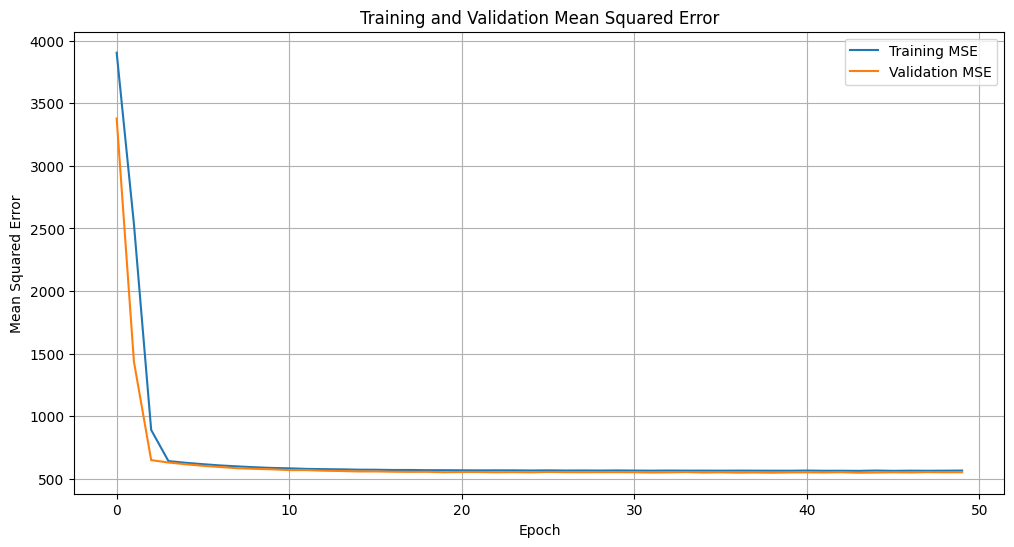

In [48]:
# question - predict product demand from frequency

# preprocess for feature select
features = shopping_datasetANN[['Previous Purchases', 'Frequency of Purchases']]
target = shopping_datasetANN['Purchase Amount (USD)']

# encode categorical variables
features.loc[:, 'Frequency of Purchases'] = LabelEncoder().fit_transform(features['Frequency of Purchases'])

# scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# define the ANN model
def create_model():
    model = models.Sequential([
        Input(shape=(scaled_features.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

# cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
maes = []
mses = []

for train_index, test_index in kf.split(scaled_features):
    X_train, X_test = scaled_features[train_index], scaled_features[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    model = create_model()
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    y_pred = model.predict(X_test)
    maes.append(mean_absolute_error(y_test, y_pred))
    mses.append(mean_squared_error(y_test, y_pred))

# average metrics
print(f'Average Mean Absolute Error: {np.mean(maes):.2f}')
print(f'Average Mean Squared Error: {np.mean(mses):.2f}')

# final model training on the entire dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
model = create_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# evaluate the final model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Final Model Mean Absolute Error: {mae:.2f}')
print(f'Final Model Mean Squared Error: {mse:.2f}')

# visualize training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-49-201b83347ab0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = le.fit_transform(features[column])
<ipython-input-49-201b83347ab0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = le.fit_transform(features[column])
<ipython-input-49-201b83347ab0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Average Accuracy: 1.00
Average Mean Absolute Error: 0.00
Average Mean Squared Error: 0.00
Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7606 - loss: 0.5217 - val_accuracy: 1.0000 - val_loss: 0.0518
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0312 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 8.8295e-04
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.1

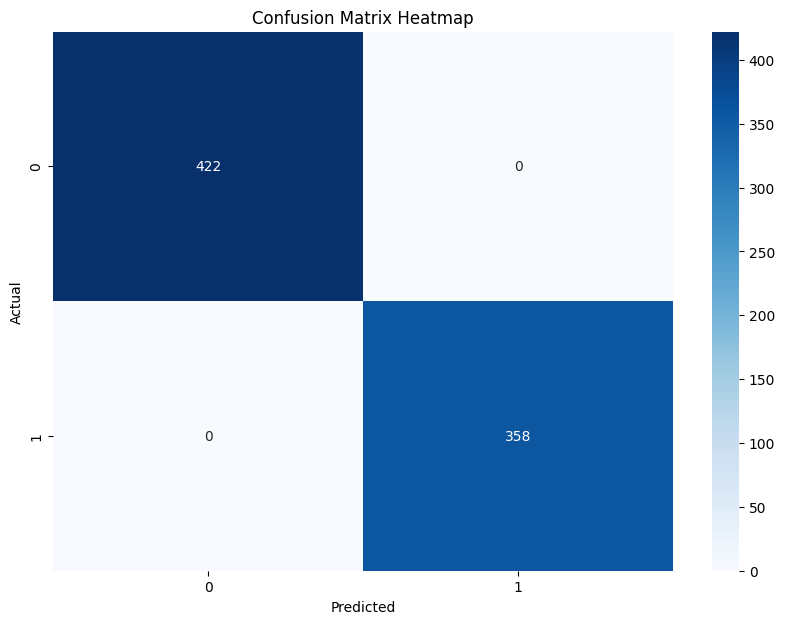

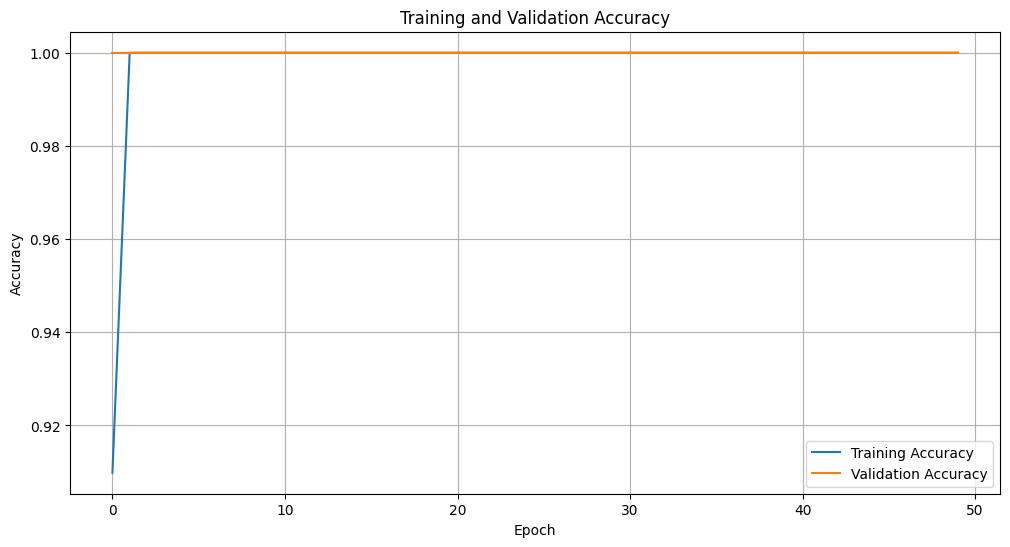

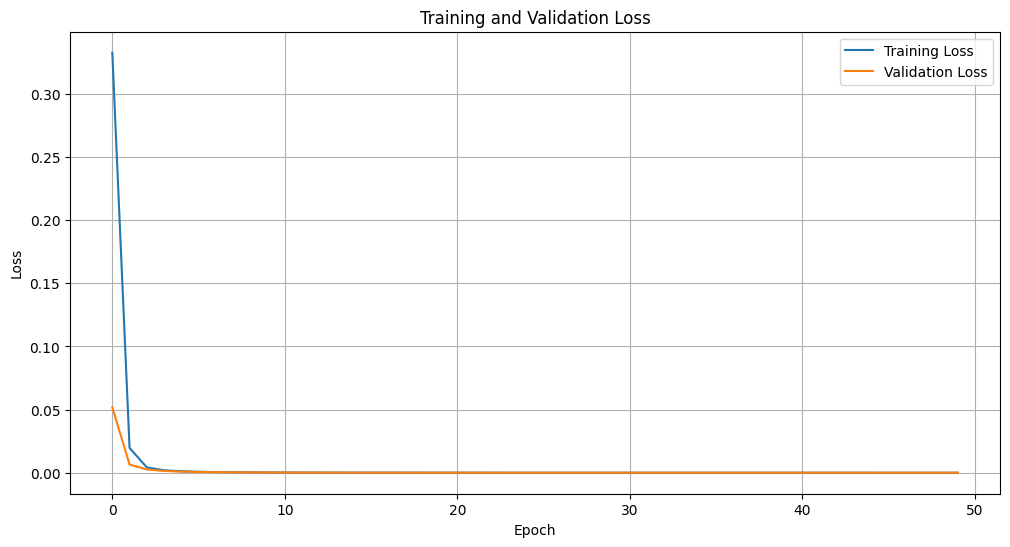

In [49]:
# question - are current marketing strategies effective

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras import models, layers

# preprocess the data
features = shopping_datasetANN[['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Size', 'Color', 'Shipping Type', 'Promo Code Used']]
target = shopping_datasetANN['Discount Applied']

# encode categorical variables
label_encoders = {}
for column in features.columns:
    if features[column].dtype == 'object':
        le = LabelEncoder()
        features[column] = le.fit_transform(features[column])
        label_encoders[column] = le

# encode target variable
target_encoder = LabelEncoder()
target = target_encoder.fit_transform(target)

# scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# define ANN model
def create_model():
    model = models.Sequential([
        Input(shape=(scaled_features.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(2, activation='softmax')  # Assuming binary classification
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
maes = []
mses = []

for train_index, test_index in kf.split(scaled_features):
    X_train, X_test = scaled_features[train_index], scaled_features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    model = create_model()
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracies.append(accuracy_score(y_test, y_pred))
    maes.append(mean_absolute_error(y_test, y_pred))
    mses.append(mean_squared_error(y_test, y_pred))

# average metrics
print(f'Average Accuracy: {np.mean(accuracies):.2f}')
print(f'Average Mean Absolute Error: {np.mean(maes):.2f}')
print(f'Average Mean Squared Error: {np.mean(mses):.2f}')

# final model training on the entire dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
model = create_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# evaluate the final model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Final Model Accuracy: {accuracy:.2f}')
print(f'Final Model Mean Absolute Error: {mae:.2f}')
print(f'Final Model Mean Squared Error: {mse:.2f}')
print("Final Model Classification Report:")
print(classification_report(y_test, y_pred))

# confusion Matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# visualize training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
